In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from datetime import datetime
from pandas.plotting import scatter_matrix

In [7]:
%matplotlib inline

In [8]:
plt.rcParams['figure.figsize'] = (10,5)

In [9]:
saved_style_state = matplotlib.rcParams.copy()

In [10]:
notCountries = [
    "Europe", 
    "Africa", 
    "North Africa", 
    "Asia & Oceania", 
    "Americas", 
    "Central America and the Caribbean", 
    "North America", 
    "Central Asia", 
    "South Asia", 
    "South-East Asia", 
    "Oceania", 
    "Europe", 
    "Eastern Europe", 
    "Western Europe", 
    "Middle East"
    ]

In [11]:
def clean_out_xxx(value):
    try:
        return float(value)
    except:
        return np.nan



In [12]:
############################### CURRENT USD ################################

currentUSD = pd.read_excel("MilitarySpending.xlsx", sheet_name="Current USD", skiprows=5, skipfooter=8, index_col="Country")

currentUSD.columns = [currentUSD.columns[0]] + [pd.Timestamp(year=y, month=1, day=1) for y in currentUSD.columns[1:]]


currentUSD.drop(notCountries, axis="index", inplace=True)
currentUSD.drop(['Notes'], axis="columns", inplace=True)


currentUSD =  currentUSD.transpose()

for colName in currentUSD.columns:
        currentUSD[colName] = currentUSD[colName].apply(clean_out_xxx)
#currentUSD.sample(10)


In [13]:
############################### PER CAPITA #################################

perCapita = pd.read_excel("MilitarySpending.xlsx", sheet_name="Per capita", skiprows=6, skipfooter=8, index_col="Country")

perCapita.columns = [perCapita.columns[0]] + [pd.Timestamp(year=y, month=1, day=1) for y in perCapita.columns[1:]]


perCapita.drop(notCountries, axis="index", inplace=True)
perCapita.drop(['Notes'], axis="columns", inplace=True)


perCapita =  perCapita.transpose()

for colName in perCapita.columns:
        perCapita[colName] = perCapita[colName].apply(clean_out_xxx)


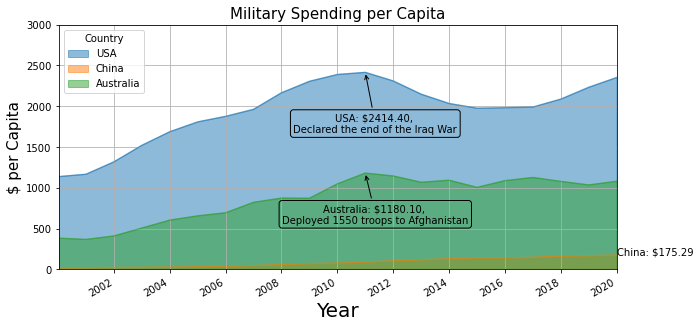

In [14]:
UCA_perCap = perCapita[['USA', 'China', 'Australia']]
ax = UCA_perCap.plot(kind='area', stacked=False)
for column in UCA_perCap:
    try:
        max_val = UCA_perCap[column].max()
        min_val = UCA_perCap[column].min()
        i=UCA_perCap[column].idxmax()
        if column == "USA":
            ax.annotate(f"{column}: ${max_val:.2f}, \nDeclared the end of the Iraq War",
            bbox=dict(boxstyle="round", fc="none", ec="black"),
            xy=(i, max_val), xytext=(10, -60), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
        elif column == "Australia":
            ax.annotate(f"{column}: ${max_val:.2f}, \nDeployed 1550 troops to Afghanistan",
            bbox=dict(boxstyle="round", fc="none", ec="black"),
            xy=(i, max_val), xytext=(10, -50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
        else :
            ax.annotate(f"{column}: ${max_val:.2f}", xy=(i, max_val))

    except Exception as e:
        print(columns, e)
plt.xlim(["2000-01-10", "2020-01-01"])
plt.ylim([0, 3000])
plt.title("Military Spending per Capita", fontsize=15)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("$ per Capita", fontsize=15)
plt.grid(True)

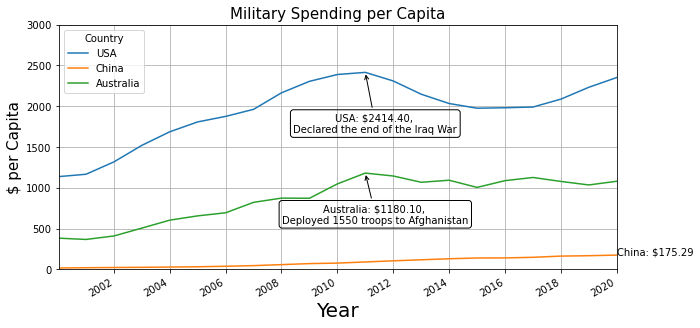

In [15]:
UCA_perCap = perCapita[['USA', 'China', 'Australia']]
ax = UCA_perCap.plot()
for column in UCA_perCap:
    try:
        max_val = UCA_perCap[column].max()
        min_val = UCA_perCap[column].min()
        i=UCA_perCap[column].idxmax()
        if column == "USA":
            ax.annotate(f"{column}: ${max_val:.2f}, \nDeclared the end of the Iraq War",
            bbox=dict(boxstyle="round", fc="none", ec="black"),
            xy=(i, max_val), xytext=(10, -60), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
        elif column == "Australia":
            ax.annotate(f"{column}: ${max_val:.2f}, \nDeployed 1550 troops to Afghanistan",
            bbox=dict(boxstyle="round", fc="none", ec="black"),
            xy=(i, max_val), xytext=(10, -50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
        else :
            ax.annotate(f"{column}: ${max_val:.2f}", xy=(i, max_val))

    except Exception as e:
        print(columns, e)
plt.xlim(["2000-01-10", "2020-01-01"])
plt.ylim([0, 3000])
plt.title("Military Spending per Capita", fontsize=15)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("$ per Capita", fontsize=15)
plt.grid(True)

(10601.0, 18262.0)

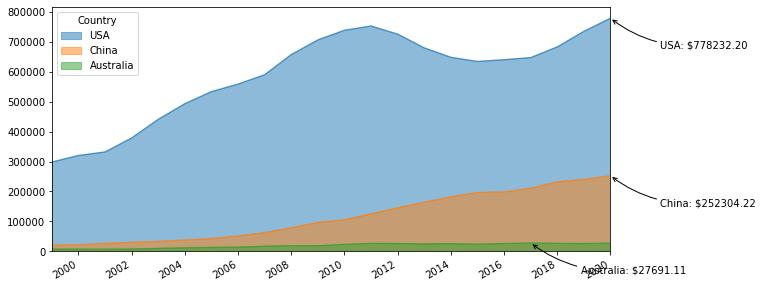

In [16]:
UCA_usd = currentUSD[['USA', 'China', 'Australia']]
bx = UCA_usd.plot(kind='area', stacked=False)
for column in UCA_usd:
    try:
        max_val = UCA_usd[column].max()
        min_val = UCA_usd[column].min()
       # if max_val > min_val*10:
        i=UCA_usd[column].idxmax()
        bx.annotate(f"{column}: ${max_val:.2f}", xy=(i,max_val), 
        xytext=(50, -30), textcoords='offset points',
        arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2"))
    
    except Exception as e:
        print(columns, e)

plt.xlim(["1999-01-10", "2020-01-01"])

(10966.0, 18262.0)

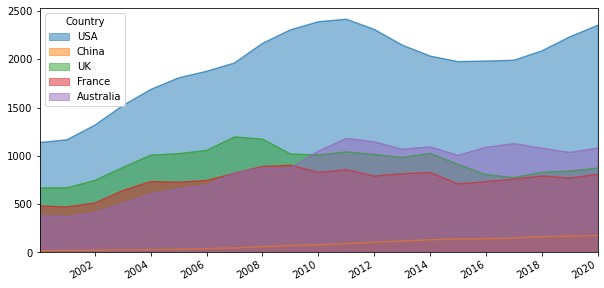

In [17]:
fd3 = perCapita[['USA', 'China', 'UK', 'France', 'Australia']]
fd3.plot(kind = 'area', stacked=False)
plt.xlim(['2000-01-10', '2020-01-01'])

array([[<AxesSubplot:xlabel='UK', ylabel='UK'>,
        <AxesSubplot:xlabel='France', ylabel='UK'>,
        <AxesSubplot:xlabel='Australia', ylabel='UK'>,
        <AxesSubplot:xlabel='Germany', ylabel='UK'>],
       [<AxesSubplot:xlabel='UK', ylabel='France'>,
        <AxesSubplot:xlabel='France', ylabel='France'>,
        <AxesSubplot:xlabel='Australia', ylabel='France'>,
        <AxesSubplot:xlabel='Germany', ylabel='France'>],
       [<AxesSubplot:xlabel='UK', ylabel='Australia'>,
        <AxesSubplot:xlabel='France', ylabel='Australia'>,
        <AxesSubplot:xlabel='Australia', ylabel='Australia'>,
        <AxesSubplot:xlabel='Germany', ylabel='Australia'>],
       [<AxesSubplot:xlabel='UK', ylabel='Germany'>,
        <AxesSubplot:xlabel='France', ylabel='Germany'>,
        <AxesSubplot:xlabel='Australia', ylabel='Germany'>,
        <AxesSubplot:xlabel='Germany', ylabel='Germany'>]], dtype=object)

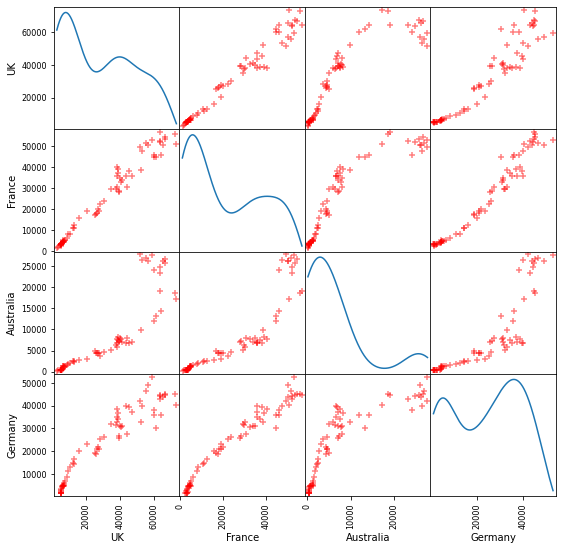

In [18]:
scatter = currentUSD[['UK', 'France', 'Australia', "Germany"]]
scatter_matrix(scatter, alpha=0.5, figsize=(9, 9), diagonal='density', marker='+', color='red')
#hist_kwds={'bins':30}